In [8]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt 
from matrix import Matrix
from neuralNetwork import NeuralNetwork
from layer import Layer

In [9]:
(x, y) = load_digits(return_X_y=True)
print(x.data.shape)
print(y.data.shape)

(1797, 64)
(1797,)


In [10]:
x_data = np.array(x.data).tolist()
y_data = np.array(y.data).tolist()
x_train, y_train, x_test, y_test = Matrix.train_test_split(x_data, y_data, 0.8)

In [11]:
x_train = Matrix.from_array2d(x_train)
x_train.mult(1/16)
x_test = Matrix.from_array2d(x_test)
x_test.mult(1/16)

for i in range(len(y_train)):
    y_train[i] = Matrix.one_hot(y_train[i], 10)
for i in range(len(y_test)):
    y_test[i] = Matrix.one_hot(y_test[i], 10)

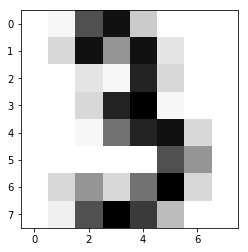

In [12]:
plt.gray() 
plt.imshow(Matrix.from_array(x_test.arr[0]).reshape(8,8).arr, cmap='Greys')
plt.show()

In [68]:
model = NeuralNetwork()
model.set_input_nodes(x_train.cols)
model.add_layer(8, 'sigmoid')
model.add_layer(8, 'sigmoid')
model.add_layer(10, 'sigmoid')
model.set_lr(0.1)

In [69]:
print('Testing accuracy before training:')
model.test(x_test.arr, y_test)

Testing accuracy before training:

Testing...
Done testing! accuracy: 10.58496%


0.10584958217270195

In [70]:
model.train(x_train.arr, y_train, 3)


Training:
 epoch 1...
 Done epoch 1!
 epoch 2...
 Done epoch 2!
 epoch 3...
 Done epoch 3!
Done Training


In [71]:
print('Testing accuracy after training:')
model.test(x_test.arr, y_test)

Testing accuracy after training:

Testing...
Done testing! accuracy: 47.07521%


0.47075208913649025

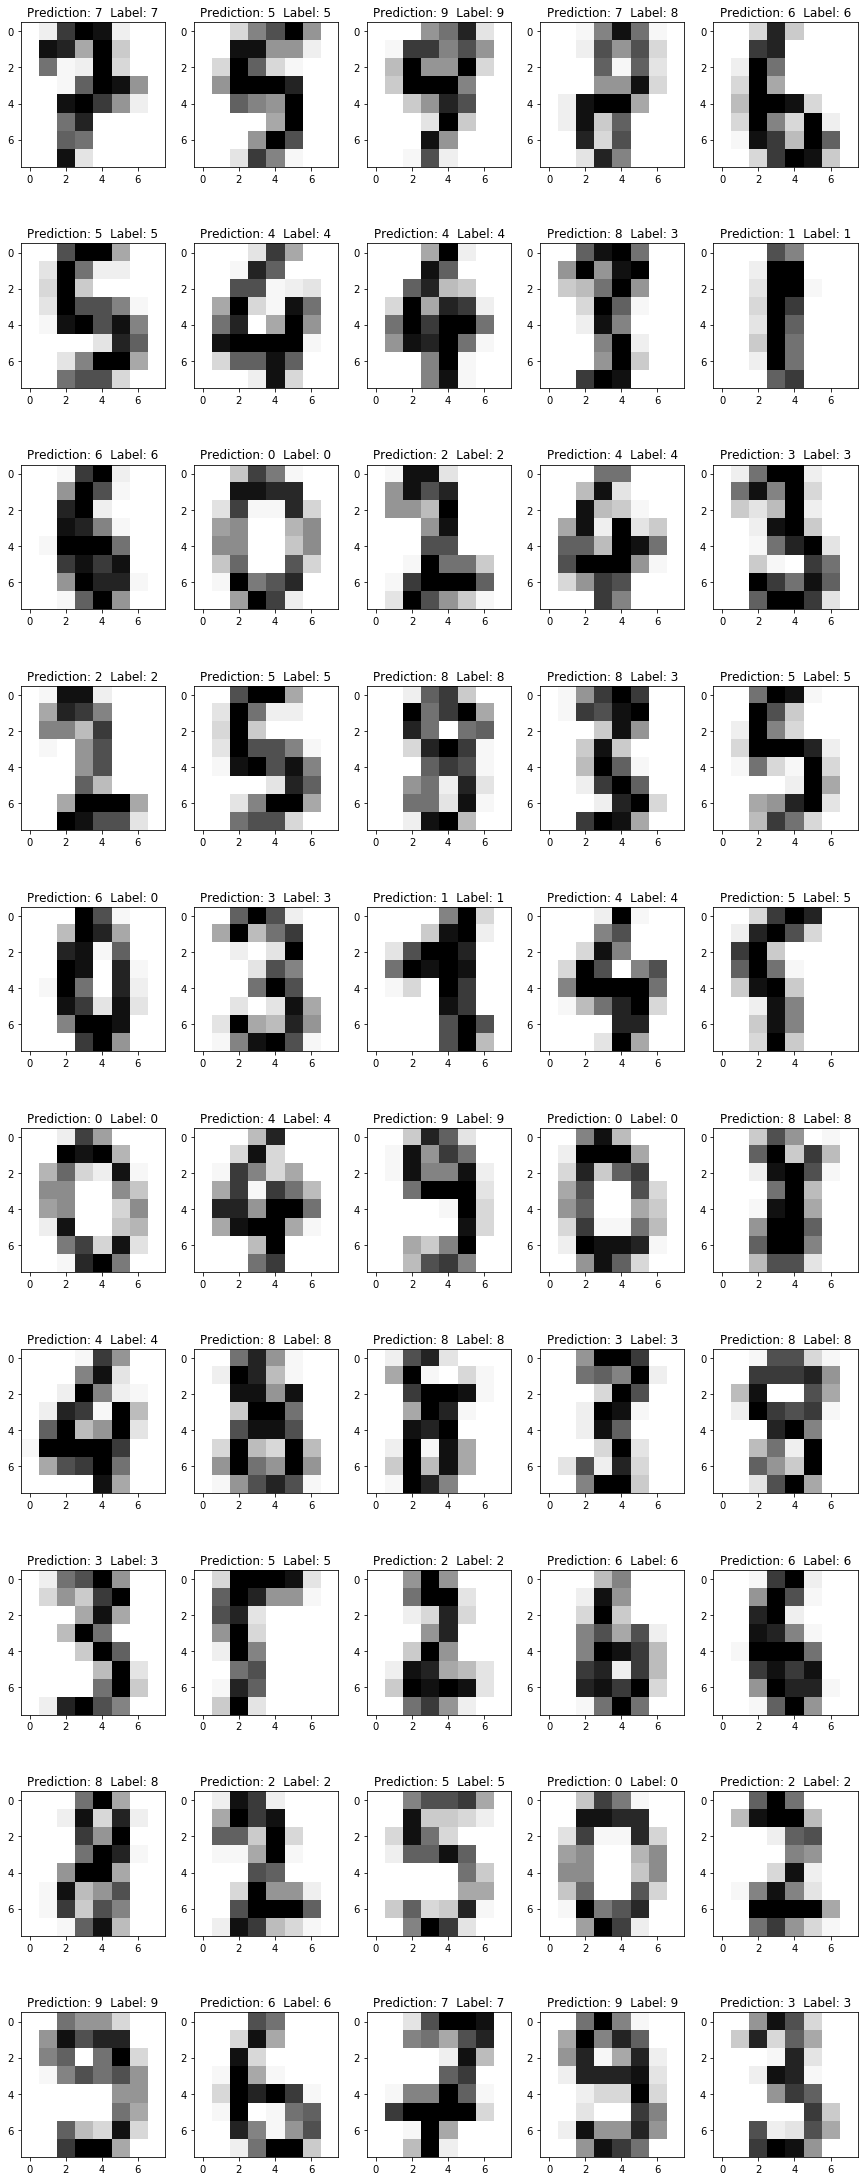

In [47]:
import random

fig = plt.figure(figsize = (15.0, 40.0))
for i in range(50):
    image_index = random.randint(0, x_test.rows-1)
    ax = fig.add_subplot(10,5,i+1)
    ax.imshow(Matrix.from_array(x_test.arr[image_index]).reshape(8,8).arr,cmap='Greys')
    pred = model.predict(x_test.arr[image_index])
    plt.title("Prediction: " + str(Matrix.arg_max(pred)) + "  Label: " + str(Matrix.arg_max(y_test[image_index])))
plt.show()

In [72]:
model.save('hDeepDigitModel.json', format=False)

In [73]:
saved_model = NeuralNetwork.load('hDeepDigitModel.json')

In [74]:
saved_model.test(x_test.arr, y_test)


Testing...
Done testing! accuracy: 47.07521%


0.47075208913649025

In [75]:
saved_model.train(x_train.arr, y_train, 2)


Training:
 epoch 4...
 Done epoch 4!
 epoch 5...
 Done epoch 5!
Done Training


In [76]:
saved_model.test(x_test.arr, y_test)


Testing...
Done testing! accuracy: 59.33148%


0.5933147632311978

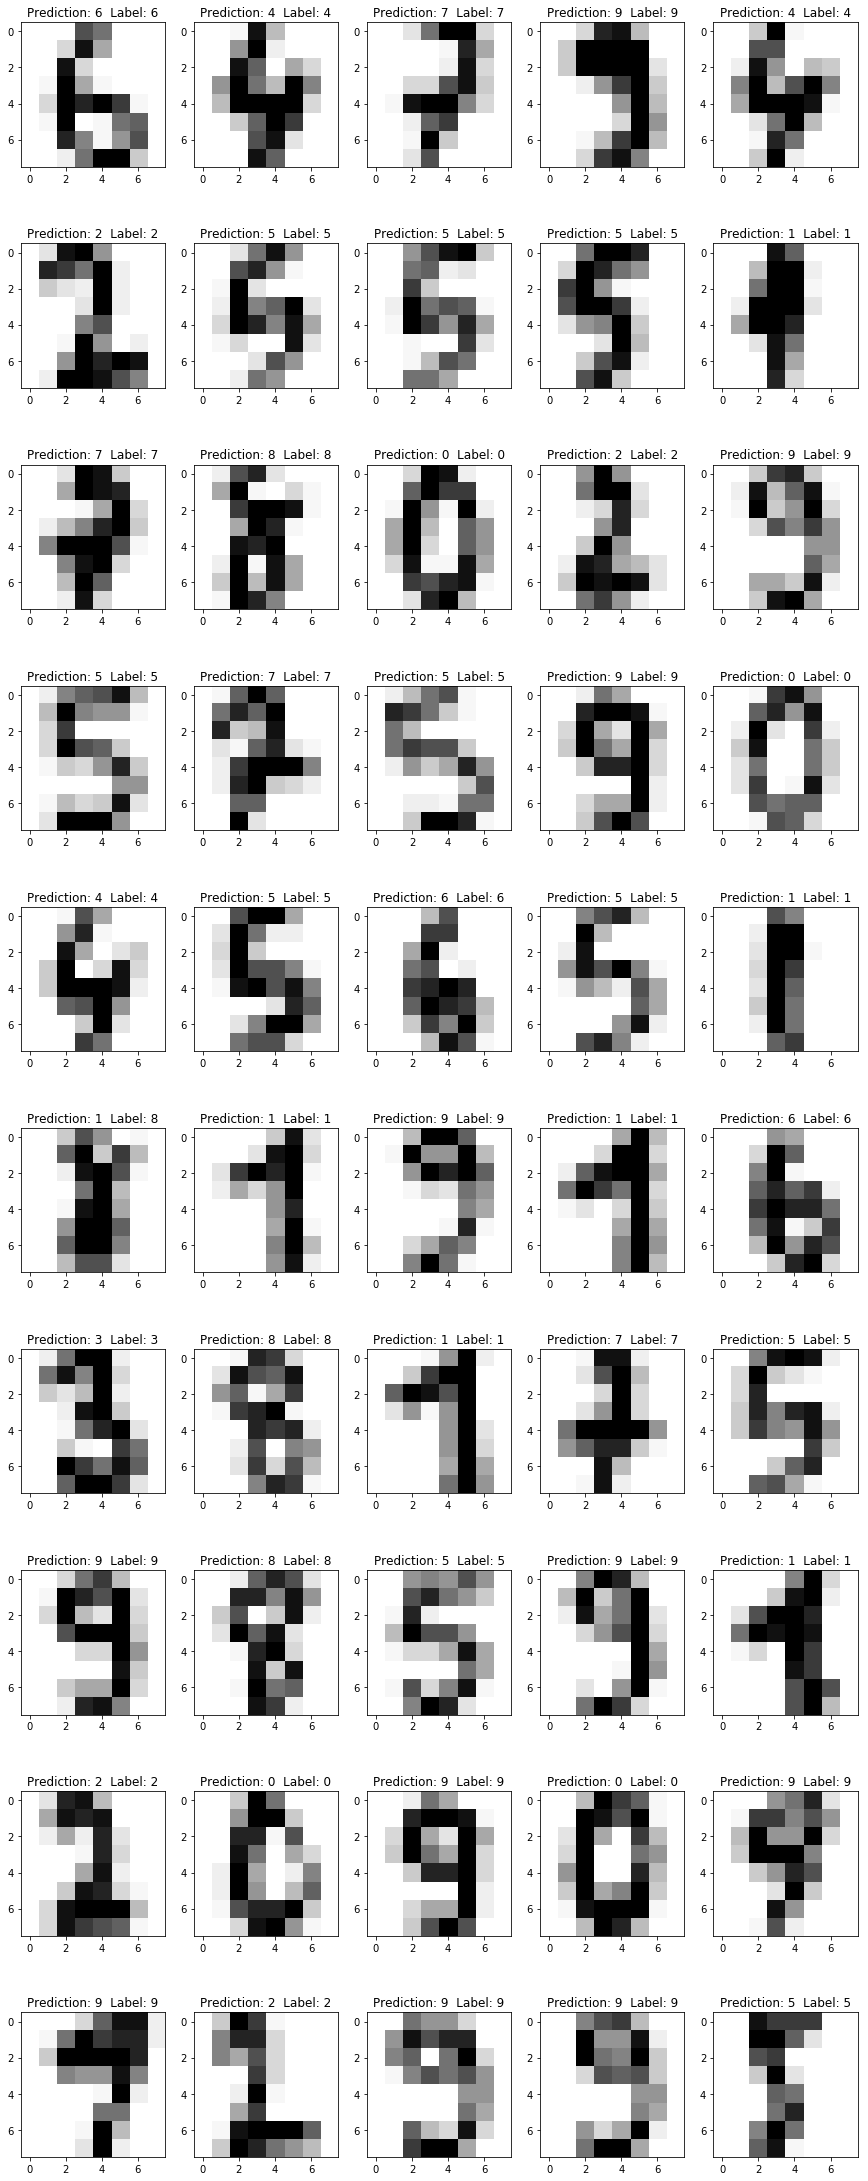

In [53]:
fig = plt.figure(figsize = (15.0, 40.0))
for i in range(50):
    image_index = random.randint(0, x_test.rows-1)
    ax = fig.add_subplot(10,5,i+1)
    ax.imshow(Matrix.from_array(x_test.arr[image_index]).reshape(8,8).arr,cmap='Greys')
    pred = saved_model.predict(x_test.arr[image_index])
    plt.title("Prediction: " + str(Matrix.arg_max(pred)) + "  Label: " + str(Matrix.arg_max(y_test[image_index])))
plt.show()